In [164]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
dataset = load_digits()
X = dataset.data
Y = dataset.target

In [166]:
X = StandardScaler().fit_transform(X)
X = PCA(n_components=0.98).fit_transform(X)
X.shape

(1797, 49)

In [167]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,shuffle=True)

In [168]:
clf = KNeighborsClassifier(n_neighbors=5,weights='uniform')
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9822222222222222

In [169]:
n = np.arange(start=1,stop=1000,step=10)
scores = {'uniform':[],'distance':[]}
for w in scores.keys():
    for i in n:
        sc = np.average(cross_val_score(KNeighborsClassifier(n_neighbors=i,weights=w),X,Y,cv=3))
        scores[w].append(sc)
scores

{'uniform': [0.9410127991096271,
  0.9354479688369505,
  0.9209794101279911,
  0.9198664440734557,
  0.9131886477462436,
  0.904284919309961,
  0.8937117417918753,
  0.8903728436282693,
  0.8831385642737897,
  0.877573734001113,
  0.8731218697829716,
  0.8670005564830272,
  0.8664440734557596,
  0.8608792431830828,
  0.8553144129104062,
  0.8525319977740679,
  0.8491930996104619,
  0.8430717863105176,
  0.8369504730105732,
  0.8286032276015581,
  0.8241513633834168,
  0.8152476349471341,
  0.8124652198107958,
  0.8080133555926544,
  0.7974401780745687,
  0.791875347801892,
  0.7829716193656093,
  0.7790762381747357,
  0.771841958820256,
  0.7662771285475793,
  0.7590428491930997,
  0.7495826377295493,
  0.7412353923205343,
  0.7373400111296605,
  0.7273233166388425,
  0.7212020033388981,
  0.7072899276572064,
  0.6994991652754591,
  0.6905954368391765,
  0.684474123539232,
  0.672787979966611,
  0.6583194212576516,
  0.6527545909849749,
  0.6438508625486923,
  0.6355036171396772,
  0.6

In [170]:
pd.DataFrame(scores)

,uniform,distance
0,0.941013,0.941013
1,0.935448,0.939343
2,0.920979,0.927101
3,0.919866,0.922649
4,0.913189,0.919866
...,...,...
95,0.327769,0.818030
96,0.326099,0.816361
97,0.321091,0.819143
98,0.320534,0.823595


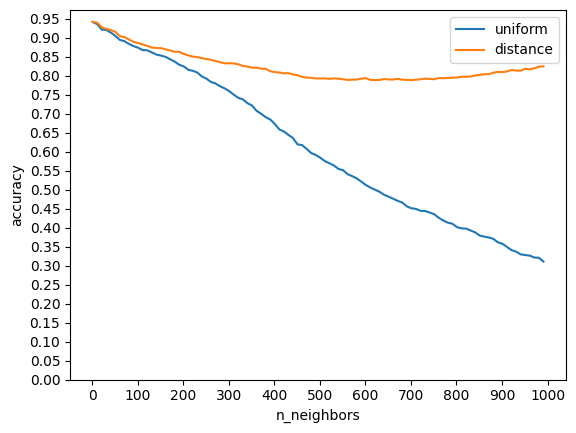

In [171]:
plt.plot(n,scores['uniform'])
plt.plot(n,scores['distance'])
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(ticks=np.arange(start=0,stop=1001,step=100))
plt.yticks(ticks=np.arange(start=0,stop=1,step=0.05))
plt.legend(['uniform','distance'])

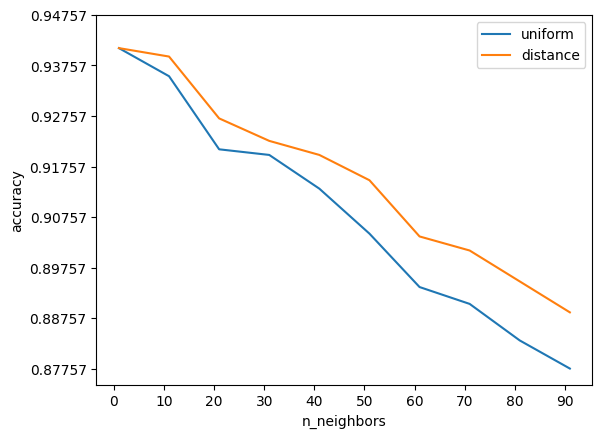

In [172]:
plt.plot(n[:10],scores['uniform'][:10])
plt.plot(n[:10],scores['distance'][:10])
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.yticks(ticks=np.arange(start=min(scores['uniform'][:10]),stop=max(scores['distance'][:10])+0.01,step=0.01))
plt.xticks(ticks=np.arange(start=0,stop=100,step=10))
plt.legend(['uniform','distance'])